# **Import Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Load data**

In [0]:
aisle=pd.read_csv('/content/drive/My Drive/Colab Notebooks/aisles.csv')
departments=pd.read_csv('/content/drive/My Drive/Colab Notebooks/departments.csv')
prior=pd.read_csv('/content/drive/My Drive/Colab Notebooks/order_products_prior. csv')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/order_products_test. csv')
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/order_products_train. csv')
orders=pd.read_csv('/content/drive/My Drive/Colab Notebooks/orders. csv')
products=pd.read_csv('/content/drive/My Drive/Colab Notebooks/products.csv')

In [0]:
orders.nunique()

days_since_prior_order         31
eval_set                        3
order_dow                       7
order_hour_of_day              24
order_id                  2178586
order_number                  197
user_id                    131209
dtype: int64

In [0]:
print('The shape of aisle is :',aisle.shape)
print('The shape of department  is :',departments.shape)
print('The shape of prior is :',prior.shape)
print('The shape of test is :',test.shape)
print('The shape of train is :',train.shape)
print('The shape of orders is :',orders.shape)
print('The shape of products is :',products.shape)

The shape of aisle is : (134, 2)
The shape of department  is : (21, 2)
The shape of prior is : (32434489, 4)
The shape of test is : (316449, 5)
The shape of train is : (1068168, 4)
The shape of orders is : (2186548, 8)
The shape of products is : (49688, 4)


In [0]:
orders.head(2)

,Unnamed: 0,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,user_id
0,0,NaN,prior,2,8,2539329,1,1
1,1,15.0,prior,3,7,2398795,2,1


In [0]:
train.head(2)

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,8,36,39612,1,0
1,9,36,19660,2,1


In [0]:
prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [0]:
prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [0]:
train = train.drop('Unnamed: 0',axis=1)

In [0]:
train.head(2)

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,8,36,39612,1,0
1,9,36,19660,2,1


In [0]:
train.nunique()

order_id             101209
product_id            36972
add_to_cart_order        80
reordered                 2
dtype: int64

# **Merging required dataframes**

In [0]:
merged = pd.concat([prior,train],axis=0)

In [0]:
merged.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
merged.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [0]:
merged.nunique()

order_id             3316083
product_id             49683
add_to_cart_order        145
reordered                  2
dtype: int64

In [0]:
merged.shape

(32434489, 8)

In [0]:
orders = orders.drop('Unnamed: 0',axis=1)

In [0]:
orders = orders[orders['order_dow']<=6]

In [0]:
merged1 = pd.merge(merged,orders,how='inner',left_on='order_id',right_on='order_id')

In [0]:
merged1.head()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_number,user_id
0,2,33120,1,1,8.0,prior,5,9,3,202279
1,2,28985,2,1,8.0,prior,5,9,3,202279
2,2,9327,3,0,8.0,prior,5,9,3,202279
3,2,45918,4,1,8.0,prior,5,9,3,202279
4,2,30035,5,0,8.0,prior,5,9,3,202279


In [0]:
merged1.nunique()

order_id                  2148586
product_id                  49518
add_to_cart_order             145
reordered                       2
days_since_prior_order         31
eval_set                        2
order_dow                       7
order_hour_of_day              24
order_number                  197
user_id                    131209
dtype: int64

In [0]:
merged1.shape

(21755368, 10)

In [0]:
df_merged1 = pd.merge(merged1, products, left_on='product_id',right_on='product_id', how='inner')
df_merged1.head(2)

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_number,user_id,product_name,aisle_id,department_id
0,2,33120,1,1,8.0,prior,5,9,3,202279,Organic Egg Whites,86,16
1,26,33120,5,0,7.0,prior,0,16,2,153404,Organic Egg Whites,86,16


In [0]:
df_merged1.shape

(21755368, 13)

In [0]:
data = df_merged1.drop(['eval_set','product_name'],axis=1)

In [0]:
data.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
days_since_prior_order    1325428
order_dow                       0
order_hour_of_day               0
order_number                    0
user_id                         0
aisle_id                        0
department_id                   0
dtype: int64

In [0]:
data.nunique()

order_id                  2148586
product_id                  49518
add_to_cart_order             145
reordered                       2
days_since_prior_order         31
order_dow                       7
order_hour_of_day              24
order_number                  197
user_id                    131209
aisle_id                      134
department_id                  21
dtype: int64

In [0]:
data.shape

(21755368, 11)

In [0]:
data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'days_since_prior_order', 'order_dow', 'order_hour_of_day',
       'order_number', 'user_id', 'aisle_id', 'department_id'],
      dtype='object')

In [0]:
data.describe()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,order_dow,order_hour_of_day,order_number,user_id,aisle_id,department_id
count,3.251084e+07,3.251084e+07,3.251084e+07,3.251084e+07,1.982284e+07,2.110734e+07,2.110734e+07,2.110734e+07,2.110734e+07,3.251084e+07,3.251084e+07
mean,1.764941e+06,2.557566e+04,8.364418e+00,5.899458e-01,1.142631e+01,2.841150e+00,1.343339e+01,1.705155e+01,1.028356e+05,7.121606e+01,9.919110e+00
std,9.560162e+05,1.409745e+04,7.135774e+00,4.918432e-01,8.979182e+00,3.434264e+00,4.250350e+00,1.751937e+01,5.948590e+04,3.820011e+01,6.281418e+00
min,3.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.372590e+05,1.352400e+04,3.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,5.143700e+04,3.100000e+01,4.000000e+00
50%,1.764573e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,1.300000e+01,1.100000e+01,1.023960e+05,8.300000e+01,9.000000e+00
75%,2.592908e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.500000e+01,5.000000e+00,1.600000e+01,2.400000e+01,1.544800e+05,1.070000e+02,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,3.000000e+01,9.900000e+01,2.300000e+01,1.000000e+02,2.062090e+05,1.340000e+02,2.100000e+01


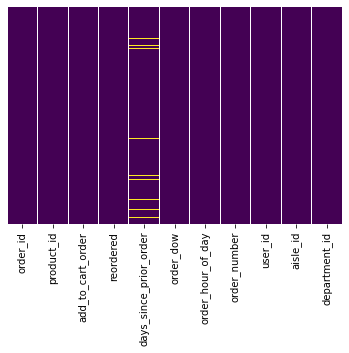

In [0]:
# Heat map to see null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [0]:
null_values = data['days_since_prior_order'].isnull().sum()/len(data['days_since_prior_order'])
print("Null value: %.2f%%" %(null_values*100))

Null value: 6.09%


Only 6% of data is null. Hence we can drop the null values.

In [0]:
data = data.dropna()

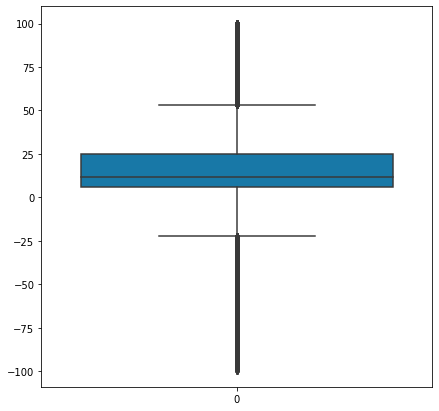

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data['order_number'],palette='winter')
plt.show()

From the above box plot we see that the order_number column had negative values, which is not possible. Hence we convert all the negative values to positive values.

In [0]:
data['order_number'] = abs(data['order_number'])

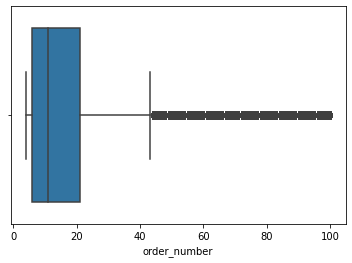

In [0]:
import seaborn as sns
sns.boxplot(data['order_number'])

In [0]:
data.shape

(20429940, 11)

# **Feature Engineering**

In [0]:
#1.1 Total_no_of_orders imply to the total number of orders for each users as per the products purchased  by them.
Total_no_of_orders = data.groupby(['user_id','product_id'])['order_id'].agg(Total_no_of_orders = 'count')
Total_no_of_orders = pd.DataFrame(Total_no_of_orders)
Total_no_of_orders.head(2)

Total_no_of_orders
user_id product_id                    
1       196                         10
        10258                       10

In [0]:
Total_no_of_orders.shape

(8903403, 1)

In [0]:
#1.2 average_days imply to the average days taken by the user to order that product
average_days = data.groupby(['user_id','product_id'])['days_since_prior_order'].agg(average_days = 'mean')
average_days = pd.DataFrame(average_days)
average_days.head(2)

average_days
user_id product_id              
1       196                 19.0
        10258               19.0

In [0]:
average_days.shape

(8903403, 1)

In [0]:
#1.3 average_reorder implies the average of the reorder for each product bought by that user
average_reorder = data.groupby(['user_id','product_id'])['reordered'].agg(average_reorder = 'mean')
average_reorder = pd.DataFrame(average_reorder)
average_reorder.head(2)

average_reorder
user_id product_id                 
1       196                     1.0
        10258                   0.9

In [0]:
average_reorder.shape

(8903403, 1)

In [0]:
average_reorder.isnull().sum()

average_reorder    0
dtype: int64

In [0]:
#1.4 product_num_everytime tells the position of the product in cart, as prefered by the user
product_num_everytime = data.groupby(['user_id','product_id'])['add_to_cart_order'].agg(product_num_everytime = 'max')
product_num_everytime=pd.DataFrame(product_num_everytime)
product_num_everytime.head(2)

product_num_everytime
user_id product_id                       
1       196                             4
        10258                           6

In [0]:
#1.5 product_time tells the hour of the day the user normally orders that product
product_time = data.groupby(['user_id','product_id'])['order_hour_of_day'].agg(product_time = 'mean')
product_time = pd.DataFrame(product_time)
product_time.head(2)

product_time
user_id product_id              
1       196                 10.3
        10258               10.3

In [0]:
#1.6 product_dow tells the day of the week the user normally orders that product
product_dow = data.groupby(['user_id','product_id'])['order_dow'].agg(product_dow = 'mean')
product_dow = pd.DataFrame(product_dow)
product_dow.head(2)

product_dow
user_id product_id             
1       196                 2.7
        10258               2.7

In [0]:
#1.7 product_order_number tells the maximum orders placed by the user for that product
product_order_number = data.groupby(['user_id','product_id'])['order_number'].agg(product_order_number = 'max')
product_order_number = pd.DataFrame(product_order_number)
product_order_number.head(2)

product_order_number
user_id product_id                      
1       196                           11
        10258                         11

**Merging all the newly created dataframes**

In [0]:
data1 = pd.concat([Total_no_of_orders,average_days,average_reorder,product_num_everytime,product_time,product_dow,product_order_number],axis=1)

In [0]:
data1.shape

(8370143, 7)

In [0]:
data1.head(2)

Total_no_of_orders  ...  product_order_number
user_id product_id                      ...                      
1       196                         10  ...                    11
        10258                       10  ...                    11

[2 rows x 7 columns]

In [0]:
data1.isnull().sum()

Total_no_of_orders       0
average_days             0
average_reorder          0
product_num_everytime    0
product_time             0
product_dow              0
product_order_number     0
dtype: int64

# **Final dataframe**

In [0]:
data_final = pd.merge(data,data1,how='inner',left_on=['user_id','product_id'],right_on=['user_id','product_id'])

In [0]:
data_final.shape

(20429940, 18)

In [0]:
data_final.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
days_since_prior_order    0
order_dow                 0
order_hour_of_day         0
order_number              0
user_id                   0
aisle_id                  0
department_id             0
Total_no_of_orders        0
average_days              0
average_reorder           0
product_num_everytime     0
product_time              0
product_dow               0
product_order_number      0
dtype: int64

In [0]:
data_final.head()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,order_dow,order_hour_of_day,order_number,user_id,aisle_id,department_id,Total_no_of_orders,average_days,average_reorder,product_num_everytime,product_time,product_dow,product_order_number
0,2,33120,1,1,8.0,5,9,3,202279,86,16,5,21.4,1.0,2,11.0,4.4,9
1,104690,33120,2,1,30.0,6,10,8,202279,86,16,5,21.4,1.0,2,11.0,4.4,9
2,132412,33120,1,1,30.0,5,9,6,202279,86,16,5,21.4,1.0,2,11.0,4.4,9
3,2808715,33120,1,1,9.0,5,13,5,202279,86,16,5,21.4,1.0,2,11.0,4.4,9
4,1050357,33120,1,1,30.0,1,14,9,202279,86,16,5,21.4,1.0,2,11.0,4.4,9


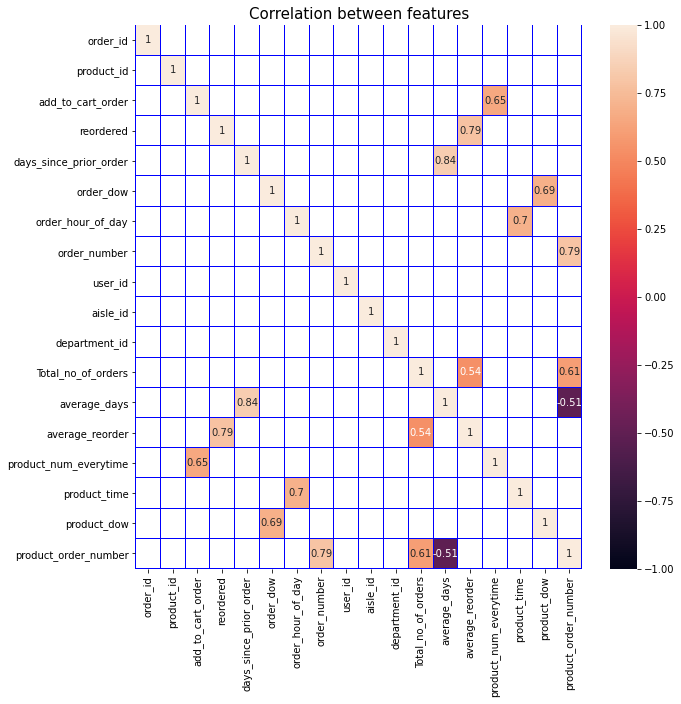

In [0]:
correlation=data_final.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.yticks(rotation=0)
plt.show()

In [0]:
data_final1 = data_final.sample(frac=0.3, random_state=1)

In [0]:
#df.to_csv(r'C:\Users\Admin\Desktop\file3.csv', index=False)
data_final1.to_csv(r'/content/drive/My Drive/Colab Notebooks/data_final1.csv',index=False)

# **Splitting the dataframe**

In [0]:
target = data_final1[['reordered']]

In [0]:
data_final1 = data_final1.drop('reordered',axis=1)

In [0]:
data_final1.shape

(6128982, 17)

In [0]:
data_final1.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
days_since_prior_order    0
order_dow                 0
order_hour_of_day         0
order_number              0
user_id                   0
aisle_id                  0
department_id             0
Total_no_of_orders        0
gmpl                      0
user_fgl                  0
product_num_everytime     0
product_time              0
product_dow               0
product_order_number      0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data_final1, target, test_size = 0.30, random_state=1)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (4290287, 17)
x_test  (1838695, 17)
y_train  (4290287, 1)
y_test  (1838695, 1)


# **Logistic Regression**

In [0]:
import statsmodels.api as sm
#build logit model
logit = sm.Logit(y_train, x_train)

#fit the model
model1 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.253314
         Iterations 8


In [0]:
#predict values using test data
prediction = model1.predict(x_test)

In [0]:
#Making y_pred as dataframe
prediction = pd.DataFrame(prediction)
prediction.head()

,0
16433237,0.019568
16755688,0.016746
4963366,0.999996
12323776,0.997868
6396255,0.943938


In [0]:
#assigning the class 0 and 1 based on threshold value 0.5
prediction['Predicted_Class'] = np.where(prediction >= 0.50, 1, 0)
prediction.head(5)

,0,Predicted_Class
16433237,0.019568,0
16755688,0.016746,0
4963366,0.999996,1
12323776,0.997868,1
6396255,0.943938,1


In [0]:
#checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction['Predicted_Class']))

0.8835521932675077


**Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, prediction['Predicted_Class'])
conf_matrix

array([[ 542817,  140618],
       [  73494, 1081766]])

**ROC Curve**

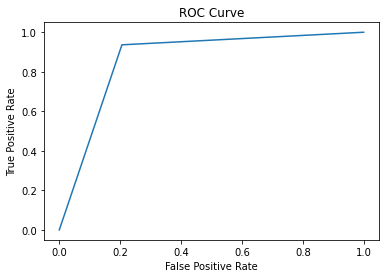

In [0]:
from sklearn.metrics import roc_curve
#generate ROC Curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, prediction['Predicted_Class'])

#plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [0]:
cols = ['Model','ROC Score','Precision Score','Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " Logistic Regression",
                  'ROC Score': metrics.roc_auc_score(y_test,prediction['Predicted_Class']),
                  'Precision Score': metrics.precision_score(y_test,prediction['Predicted_Class']),
                  'Recall Score': metrics.recall_score(y_test,prediction['Predicted_Class']),
                  'Accuracy Score': metrics.accuracy_score(y_test,prediction['Predicted_Class'])})

model_report1 = models_report.append(tmp1, ignore_index = True)
model_report1

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Logistic Regression,0.865316,0.884964,0.936383,0.883552


# **Decision Tree**

In [0]:
#Building a decision tree model using 'entropy' solver and splitter 'best'
from sklearn.tree import DecisionTreeClassifier
clf_DT1=DecisionTreeClassifier(criterion='entropy')
#fitting the model
clf_DT1.fit(x_train,y_train)
#predicting the model
y_pred_DT1=clf_DT1.predict(x_test)

In [0]:
clf_DT1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
cols = ['Model','ROC Score','Precision Score','Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " Decision tree with entropy",
                  'ROC Score': metrics.roc_auc_score(y_test,y_pred_DT1),
                  'Precision Score': metrics.precision_score(y_test,y_pred_DT1),
                  'Recall Score': metrics.recall_score(y_test,y_pred_DT1),
                  'Accuracy Score': metrics.accuracy_score(y_test,y_pred_DT1)})

model_report2 = models_report.append(tmp1, ignore_index = True)
model_report2

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision tree with entropy,0.92925,0.948076,0.946087,0.933571


In [0]:
#Building aa decision tree model using 'gini' solver and splitter 
clf_DT2=DecisionTreeClassifier(criterion='gini')
#fitting the model
clf_DT2.fit(x_train,y_train)
#predicting the model
y_pred_DT2=clf_DT2.predict(x_test)

In [0]:
tmp2 = pd.Series({'Model': " Decision tree with gini",
                  'ROC Score': metrics.roc_auc_score(y_test,y_pred_DT2),
                  'Precision Score': metrics.precision_score(y_test,y_pred_DT2),
                  'Recall Score': metrics.recall_score(y_test,y_pred_DT2),
                  'Accuracy Score': metrics.accuracy_score(y_test,y_pred_DT2)})

model_report3 = models_report.append(tmp2, ignore_index = True)
model_report3

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision tree with gini,0.928187,0.947858,0.944169,0.932288


**Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT1)
conf_matrix

array([[ 623575,   59860],
       [  62283, 1092977]])

**ROC Curve**

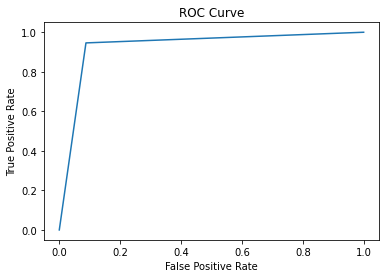

In [0]:
from sklearn.metrics import roc_curve
#generate ROC Curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DT1)

#plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest model
random = RandomForestClassifier()

In [0]:
random.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#predictions
pred_random=random.predict(x_test)

In [0]:
#accuracy score for the random forest model
accuracy_score(pred_random, y_test)

0.9487886789271739

**Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_random)
conf_matrix

array([[ 611561,   71874],
       [  22288, 1132972]])

**ROC Curve**

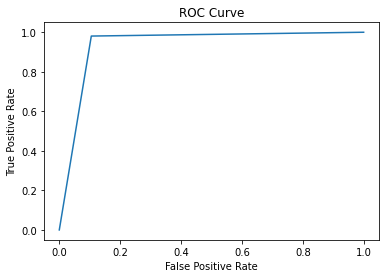

In [0]:
from sklearn.metrics import roc_curve
#generate ROC Curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred_random)

#plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [0]:
cols = ['Model','ROC Score','Precision Score','Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " Random Forest",
                  'ROC Score': metrics.roc_auc_score(y_test,pred_random),
                  'Precision Score': metrics.precision_score(y_test,pred_random),
                  'Recall Score': metrics.recall_score(y_test,pred_random),
                  'Accuracy Score': metrics.accuracy_score(y_test,pred_random)})

model_report4 = models_report.append(tmp1, ignore_index = True)
model_report4

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest,0.937771,0.940346,0.980707,0.948789


# **AdaBoost Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
#creating an Object instance of ADA BOOST Classifier
adb = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=0)
#Creating a train model
mod_boost = adb.fit(x_train,y_train)

In [0]:
#Checking the accuracy of the trained model
adb.score(x_test,y_test)

0.9287483786054783

In [0]:
pred_adb = mod_boost.predict(x_test)

**Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_adb)
conf_matrix

array([[ 578569,  104866],
       [  26144, 1129116]])

**ROC Curve**

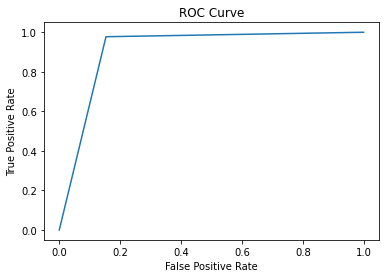

In [0]:
from sklearn.metrics import roc_curve
#generate ROC Curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred_adb)

#plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [0]:
cols = ['Model','ROC Score','Precision Score','Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " AdaBoost Classifier",
                  'ROC Score': metrics.roc_auc_score(y_test,pred_adb),
                  'Precision Score': metrics.precision_score(y_test,pred_adb),
                  'Recall Score': metrics.recall_score(y_test,pred_adb),
                  'Accuracy Score': metrics.accuracy_score(y_test,pred_adb)})

model_report5 = models_report.append(tmp1, ignore_index = True)
model_report5

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,AdaBoost Classifier,0.911965,0.915018,0.97737,0.928748


# **XGB Classifier**

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import itertools

In [0]:
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train) # creating the train model

[11:50:16] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# DOING THE PREDICTION
test_pred = xg_model.predict(x_test)

In [0]:
#Checking the accuracy of our XGBoost Classifier
test_accuracy = accuracy_score(y_test,test_pred)
print("Test Accuracy: %.2f%%" %(test_accuracy*100))

Test Accuracy: 92.96%


**Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, test_pred)
conf_matrix

array([[ 569019,  114416],
       [  15099, 1140161]])

**ROC Curve**

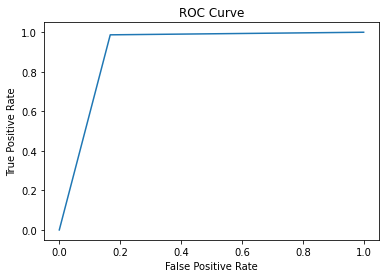

In [0]:
from sklearn.metrics import roc_curve
#generate ROC Curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

#plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [0]:
cols = ['Model','ROC Score','Precision Score','Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " XGBoost Classifier",
                  'ROC Score': metrics.roc_auc_score(y_test,test_pred),
                  'Precision Score': metrics.precision_score(y_test,test_pred),
                  'Recall Score': metrics.recall_score(y_test,test_pred),
                  'Accuracy Score': metrics.accuracy_score(y_test,test_pred)})

model_report6 = models_report.append(tmp1, ignore_index = True)
model_report6

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,XGBoost Classifier,0.909759,0.908801,0.98693,0.929561


# **Summary of all the models**

In [0]:
# Comparison of various model
cols = ['Model','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model_report1,model_report2,model_report3,model_report4,model_report5,model_report6], ignore_index = True)
clas_model

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Logistic Regression,0.865316,0.884964,0.936383,0.883552
1,Decision tree with entropy,0.929250,0.948076,0.946087,0.933571
2,Decision tree with gini,0.928187,0.947858,0.944169,0.932288
3,Random Forest,0.937771,0.940346,0.980707,0.948789
4,AdaBoost Classifier,0.911965,0.915018,0.977370,0.928748
5,XGBoost Classifier,0.909759,0.908801,0.986930,0.929561


From the above table we see that random forest gves the highest accuracy of 94%